In [175]:
#The dataset is structured to predict the most suitable crop to grow based on several agro-climatic parameters. 
#It is typically used in precision agriculture and machine learning applications aimed at supporting farmers, 
#agricultural advisors, and policymakers.

In [176]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [177]:
import pandas as pd
df = pd.read_csv(r"C:\Data Analyist\Data Analysis week 7\Crop_recommendation.csv")
df

,N,P,K,temperature,humidity,ph,rainfall,label
0,90,42,43,20.879744,82.002744,6.502985,202.935536,rice
1,85,58,41,21.770462,80.319644,7.038096,226.655537,rice
2,60,55,44,23.004459,82.320763,7.840207,263.964248,rice
3,74,35,40,26.491096,80.158363,6.980401,242.864034,rice
4,78,42,42,20.130175,81.604873,7.628473,262.717340,rice
...,...,...,...,...,...,...,...,...
2195,107,34,32,26.774637,66.413269,6.780064,177.774507,coffee
2196,99,15,27,27.417112,56.636362,6.086922,127.924610,coffee
2197,118,33,30,24.131797,67.225123,6.362608,173.322839,coffee
2198,117,32,34,26.272418,52.127394,6.758793,127.175293,coffee


In [178]:
df['label'].unique()

array(['rice', 'maize', 'chickpea', 'kidneybeans', 'pigeonpeas',
       'mothbeans', 'mungbean', 'blackgram', 'lentil', 'pomegranate',
       'banana', 'mango', 'grapes', 'watermelon', 'muskmelon', 'apple',
       'orange', 'papaya', 'coconut', 'cotton', 'jute', 'coffee'],
      dtype=object)

In [179]:
# To clean and wrangle the dataset:
# Check for missing values, Check for duplicates, Validate data types.
# Normalize/scale features
#Encode categorical target variable.

In [180]:
#1. Initial inspection
df.shape

(2200, 8)

In [181]:
df.dtypes

N                int64
P                int64
K                int64
temperature    float64
humidity       float64
ph             float64
rainfall       float64
label           object
dtype: object

In [182]:
df.head()

,N,P,K,temperature,humidity,ph,rainfall,label
0,90,42,43,20.879744,82.002744,6.502985,202.935536,rice
1,85,58,41,21.770462,80.319644,7.038096,226.655537,rice
2,60,55,44,23.004459,82.320763,7.840207,263.964248,rice
3,74,35,40,26.491096,80.158363,6.980401,242.864034,rice
4,78,42,42,20.130175,81.604873,7.628473,262.717340,rice


In [183]:
df.isnull().sum()

N              0
P              0
K              0
temperature    0
humidity       0
ph             0
rainfall       0
label          0
dtype: int64

In [184]:
df.info()             # Data types and non-null counts
df.describe()         # Summary statistics for numerical columns
df.columns            # List of column names

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2200 entries, 0 to 2199
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   N            2200 non-null   int64  
 1   P            2200 non-null   int64  
 2   K            2200 non-null   int64  
 3   temperature  2200 non-null   float64
 4   humidity     2200 non-null   float64
 5   ph           2200 non-null   float64
 6   rainfall     2200 non-null   float64
 7   label        2200 non-null   object 
dtypes: float64(4), int64(3), object(1)
memory usage: 137.6+ KB


Index(['N', 'P', 'K', 'temperature', 'humidity', 'ph', 'rainfall', 'label'], dtype='object')

In [185]:
# Encode categorical labels (target column)
# LabelEncoder converts the crop names into numeric form suitable for classification models.
# # Encode target variable
label_encoder = LabelEncoder()
df['label'] = label_encoder.fit_transform(df['label'])

In [186]:
# Drop duplicates
df = df.drop_duplicates()

In [187]:
df

,N,P,K,temperature,humidity,ph,rainfall,label
0,90,42,43,20.879744,82.002744,6.502985,202.935536,20
1,85,58,41,21.770462,80.319644,7.038096,226.655537,20
2,60,55,44,23.004459,82.320763,7.840207,263.964248,20
3,74,35,40,26.491096,80.158363,6.980401,242.864034,20
4,78,42,42,20.130175,81.604873,7.628473,262.717340,20
...,...,...,...,...,...,...,...,...
2195,107,34,32,26.774637,66.413269,6.780064,177.774507,5
2196,99,15,27,27.417112,56.636362,6.086922,127.924610,5
2197,118,33,30,24.131797,67.225123,6.362608,173.322839,5
2198,117,32,34,26.272418,52.127394,6.758793,127.175293,5


In [188]:
# Feature scaling (recommended for ML models)
# StandardScaler is used for feature scaling, which is especially important for algorithms like SVM, KNN, or logistic regression.
features = df.drop('label', axis=1)
target = df['label']

In [189]:
features

,N,P,K,temperature,humidity,ph,rainfall
0,90,42,43,20.879744,82.002744,6.502985,202.935536
1,85,58,41,21.770462,80.319644,7.038096,226.655537
2,60,55,44,23.004459,82.320763,7.840207,263.964248
3,74,35,40,26.491096,80.158363,6.980401,242.864034
4,78,42,42,20.130175,81.604873,7.628473,262.717340
...,...,...,...,...,...,...,...
2195,107,34,32,26.774637,66.413269,6.780064,177.774507
2196,99,15,27,27.417112,56.636362,6.086922,127.924610
2197,118,33,30,24.131797,67.225123,6.362608,173.322839
2198,117,32,34,26.272418,52.127394,6.758793,127.175293


In [190]:
target

0       20
1       20
2       20
3       20
4       20
        ..
2195     5
2196     5
2197     5
2198     5
2199     5
Name: label, Length: 2200, dtype: int32

In [191]:
# Train-test split
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)

In [192]:
scaler = StandardScaler()
scaler.fit(X_train)
X_train_scl = scaler.transform(X_train)
X_test_scl = scaler.transform(X_test)

In [193]:
# Create a model: 
# train the model (fit)
# Predict the result

In [194]:
# Create a model 
knn = KNeighborsClassifier(n_neighbors=5)

In [195]:
# Training the model (fit)
knn.fit(X_train, y_train)

KNeighborsClassifier()

In [196]:
# Now, our model is already trained, we can make predictions for new data points
pred = knn.predict(X_test)
pred

array([15, 21, 17, 17,  0, 12,  0, 13, 14, 10,  2,  4, 19,  8,  4, 19,  0,
        6, 17, 15,  5, 17, 16, 17,  3,  8, 14, 16, 18,  8, 19, 13,  8, 10,
        8,  2,  8,  3,  3,  9, 17, 12,  2, 11, 14, 11, 18,  4, 15, 11,  2,
        5,  7, 14,  5,  9,  6,  0,  1,  2, 21,  4, 10, 16, 17,  2, 16, 20,
       15, 18, 15,  4,  8,  1,  2, 17,  1,  6, 21, 16,  5,  3,  8, 13, 16,
       12,  5, 13,  2, 19, 11, 13,  6, 17, 18, 13,  9,  5,  2, 10,  4,  8,
       16, 15, 21,  9, 21,  1, 18, 13,  1,  8,  6, 19, 18,  3, 11,  4, 19,
       20, 18,  7,  2,  4,  3,  2,  4, 11,  1, 13,  1,  9, 19,  3,  4, 16,
       18,  1,  1,  0,  9, 15, 14, 13,  4, 11,  0,  4,  9, 13, 14, 10, 21,
       14, 18, 18, 18,  9, 11,  8,  3,  0, 16,  6, 20,  4,  7, 10, 21,  7,
        7,  2, 19,  3,  4, 11, 10,  7, 21,  8,  5,  5,  9,  8, 13,  9,  1,
        9,  4, 17, 17, 14, 12, 19, 21,  9, 11,  0,  2,  3,  7,  7,  1,  6,
       20, 19, 14,  1,  8, 14, 11,  3,  3,  3,  0, 20,  9, 17,  5,  2,  9,
       12, 12,  4, 17,  0

In [197]:
# To compare with the true labels
y_test.values

array([15, 21, 17, 17,  0, 12,  0, 13, 14, 10,  2,  4, 19,  8,  4, 19,  0,
       11, 17, 15,  5, 17, 16, 17,  3,  8, 14, 16, 18, 20, 19, 13,  8, 10,
        8,  2,  8,  3,  3,  9, 17, 12,  2, 11, 14, 11, 18,  4, 15, 11,  2,
        5,  7, 14,  5,  9,  6,  0,  1,  2, 21,  4, 10, 16, 17, 18, 16, 20,
       15, 18, 15,  4,  8,  1,  2, 17,  1,  6, 21, 16,  5,  3, 20, 13, 16,
       12,  5, 13,  2, 19, 11, 13,  6, 17, 18, 13,  9,  5,  2, 10,  4, 20,
       16, 15, 21,  9, 21,  1, 18, 13,  1,  8,  6, 19, 18,  3, 11,  4, 19,
       20, 18,  7,  2,  4,  3,  2,  4, 11,  1, 13,  1,  9, 19,  3,  4, 16,
       18,  1,  1,  0,  9, 15, 14, 13,  4, 11,  0,  4,  9, 13, 14, 10, 21,
       14, 18, 18, 18,  9, 11,  8,  3,  0, 16,  6, 20,  4,  7, 10, 21,  7,
        7,  2, 19,  3,  4, 11, 10,  7, 21,  8,  5,  5,  9,  8, 13,  9,  1,
        9,  4, 17, 17, 14, 12, 19, 21,  9, 11,  0,  2,  3,  7,  7,  1,  6,
       20, 19, 14,  1,  8, 14, 11,  3,  3,  3,  0, 20,  9, 17,  5,  2,  9,
       12, 12,  4, 17,  0

In [198]:
knn.score(X_test, y_test)

0.9704545454545455

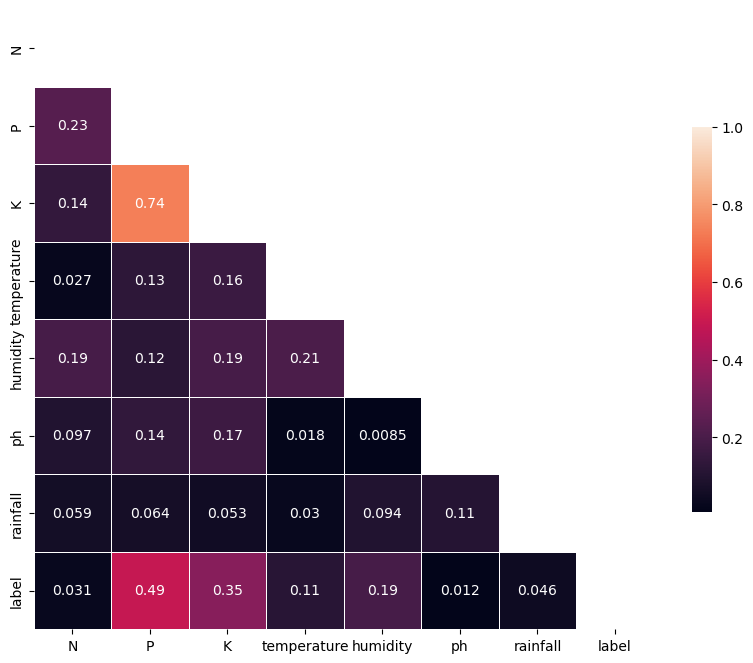

In [199]:
corr=np.abs(df.corr())

#Set up mask for triangle representation
mask = np.zeros_like(corr, dtype=bool)
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(10, 10))
# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)
# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask,  vmax=1,square=True, linewidths=.5, cbar_kws={"shrink": .5},annot = corr)

plt.show()

In [200]:
# The closer to ±1, the stronger the relationship between two variables.
# Phosphorus (P) is the most influential feature in predicting the crop, with a moderate correlation (0.49).
# Potassium (K) also plays a notable role.
#Other features like temperature, humidity, and rainfall have weaker correlations but could still help in combination.

ADVANCED MODELIN
Experiment with more powerful models, such as Ensemble models.

DECISION TREE

In [201]:
from sklearn.tree import DecisionTreeClassifier

In [202]:
dt = DecisionTreeClassifier(max_depth = 20)

dt.fit(X_train, y_train) 

DecisionTreeClassifier(max_depth=20)

In [203]:
pred  = dt.predict(X_test)

In [204]:
dt.score(X_test, y_test)

0.9840909090909091

In [205]:
from sklearn.tree import plot_tree

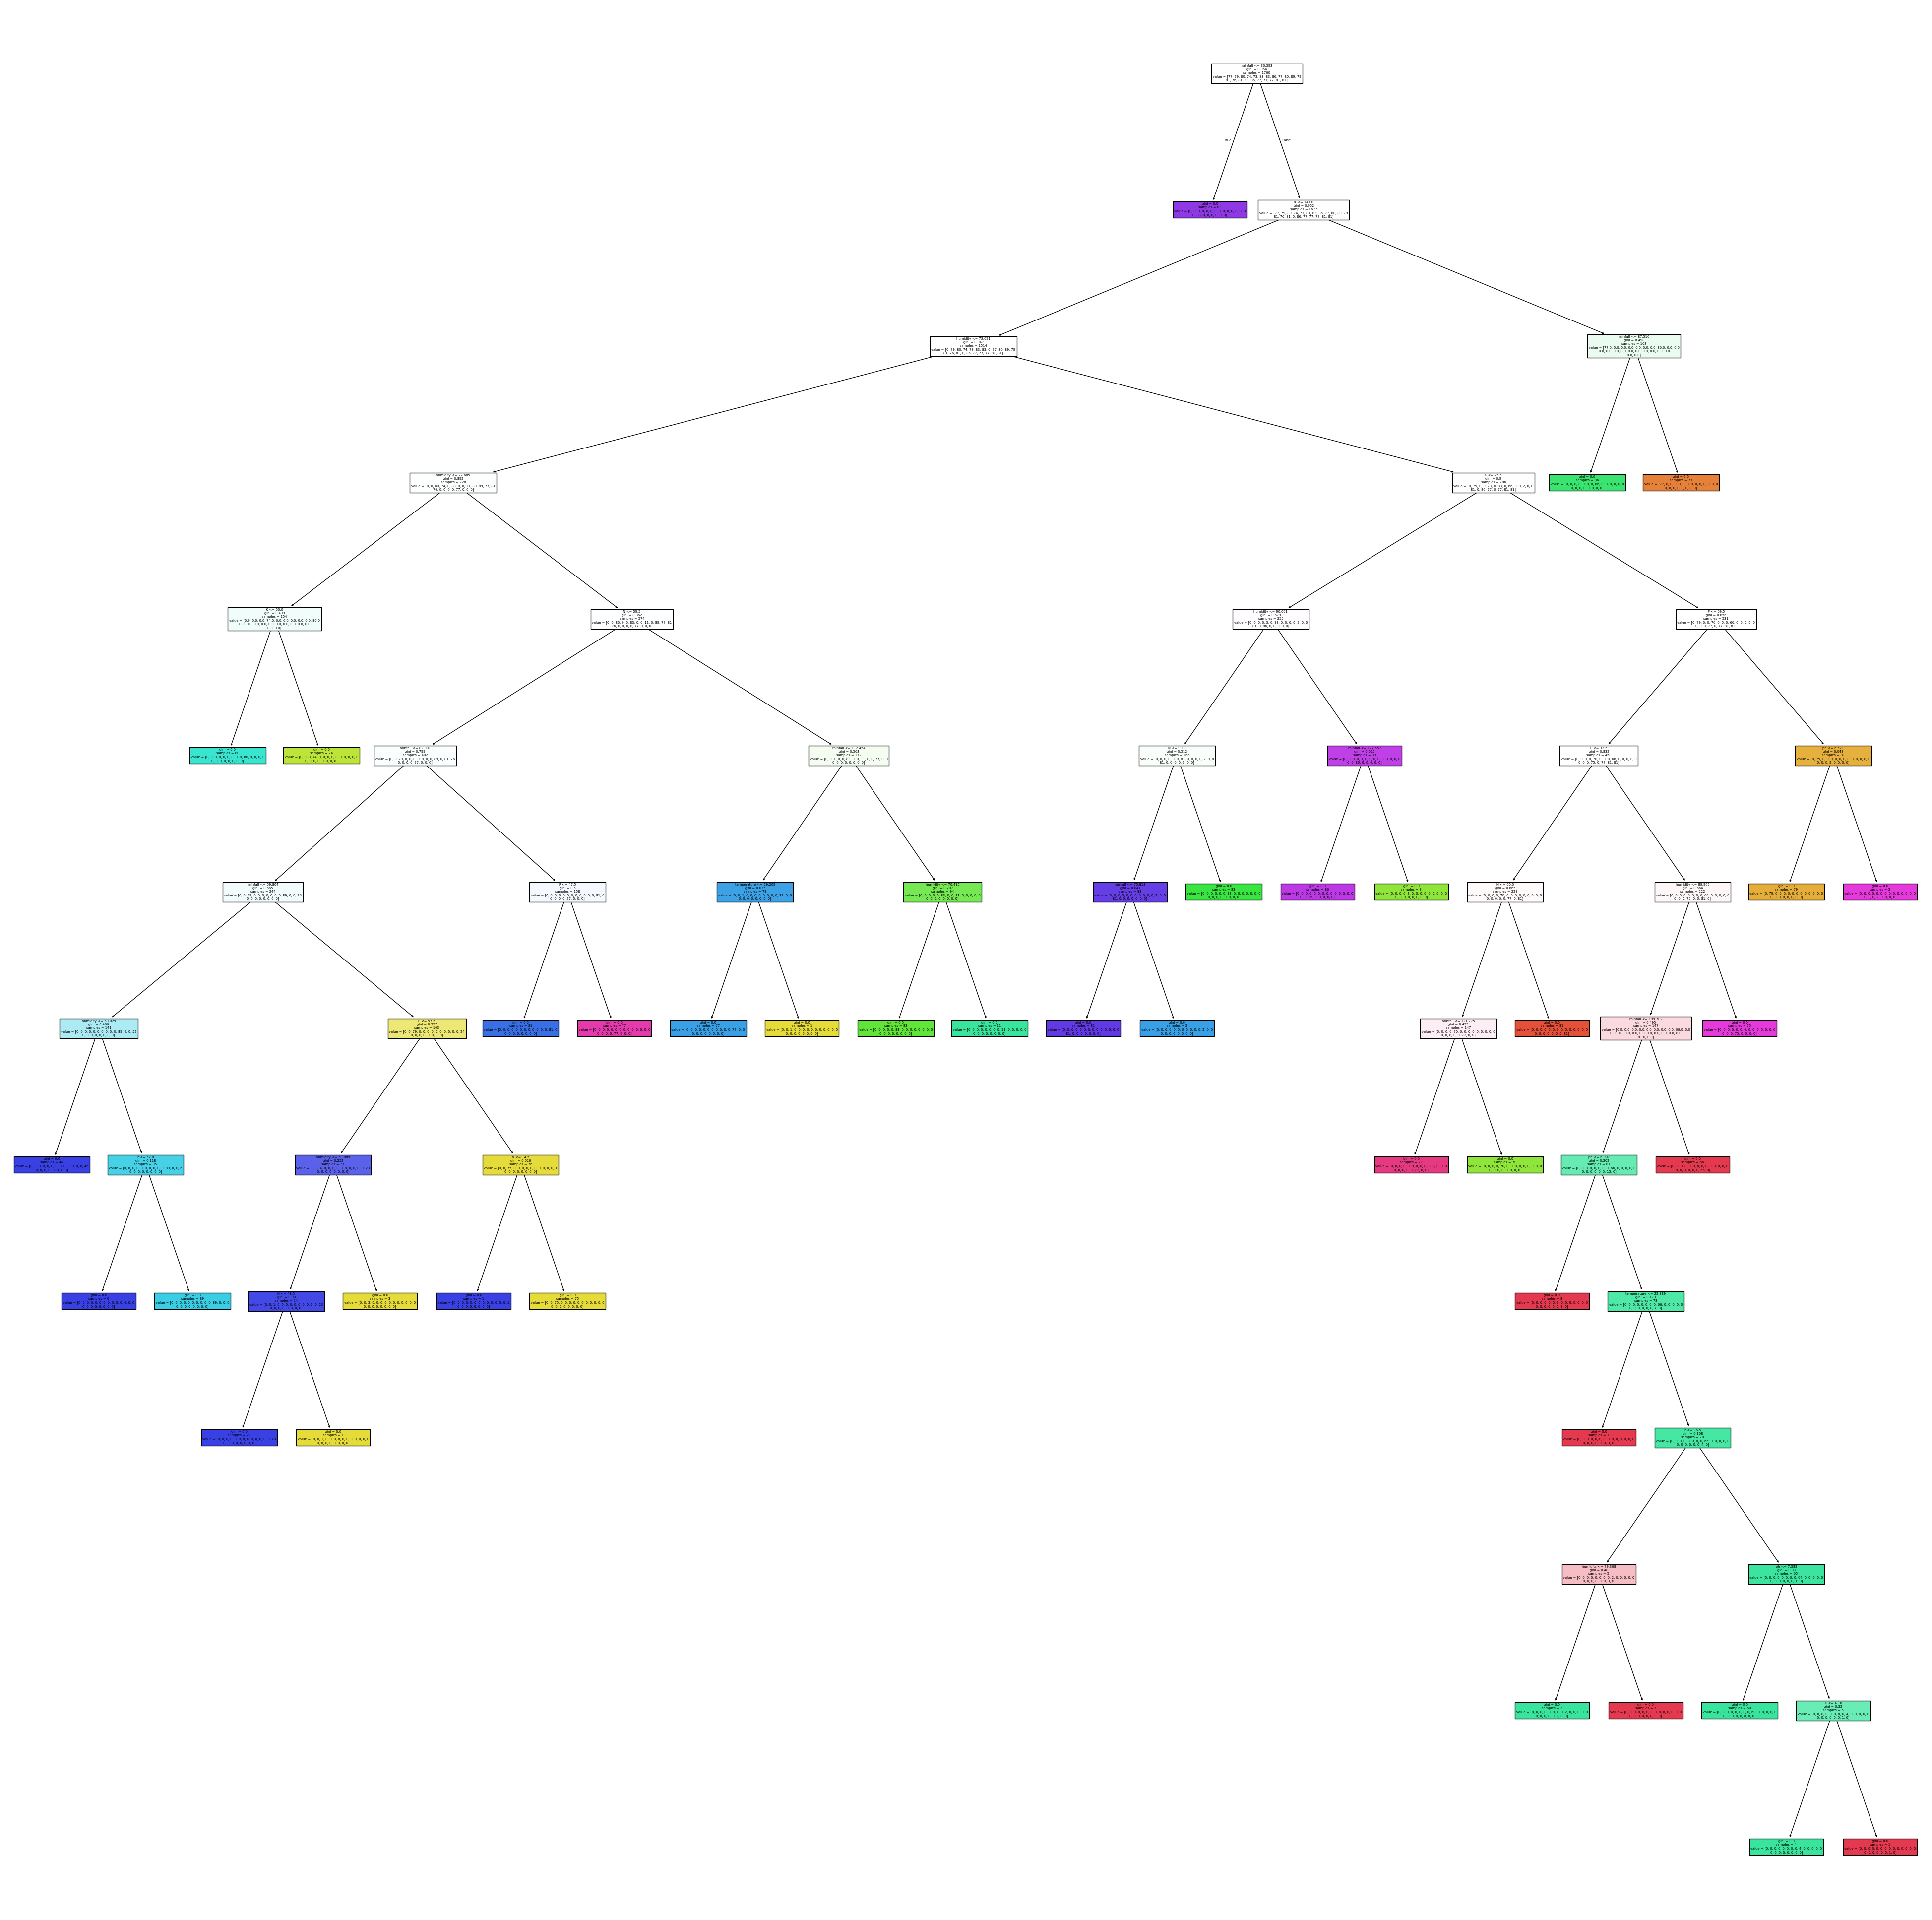

In [206]:
plt.figure(figsize=(50, 50))
plot_tree(dt, feature_names=X_train.columns, filled=True)
plt.show()

In [ ]:
#

RANDOM FOREST 

In [215]:
#your code here
from sklearn.ensemble import RandomForestClassifier

In [216]:
rf = RandomForestClassifier()

rf.fit(X_train, y_train)

RandomForestClassifier()

In [217]:
pred = rf.predict(X_test)

In [218]:
 rf.score(X_test, y_test)

0.9931818181818182

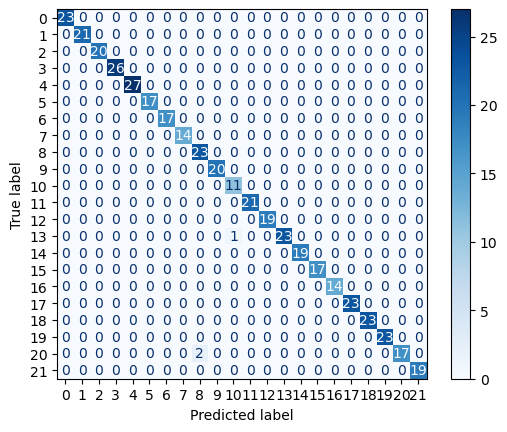

In [219]:
cm = confusion_matrix(y_test, pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap=plt.cm.Blues)
plt.show()

In [ ]:
# The diagonal values (top-left to bottom-right) represent correct predictions.
# Any non-zero value off the diagonal indicates a misclassification.
# Almost all values lie along the diagonal, which means:model correctly classified most crops.
# Very few misclassifications occurred: Class 13 was predicted correctly 22 times, but had 2 misclassifications (row 13 has 1 in column 1 and column 10).


LOGISTIC REGRESS

In [ ]:
from sklearn.linear_model import LogisticRegression

In [220]:
log_reg = LogisticRegression()

log_reg.fit(X_train, y_train)

C:\ProgramData\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [221]:
X_test.shape

(440, 7)

In [222]:
rw = X_test

In [223]:
log_reg.predict_proba(rw)

array([[2.73527934e-57, 1.08797491e-26, 1.08912113e-44, ...,
        2.70768732e-28, 3.96490892e-40, 1.84338691e-04],
       [1.05821374e-51, 5.64760824e-19, 4.22416272e-40, ...,
        5.28683363e-19, 2.48975708e-27, 9.99986454e-01],
       [2.64133352e-34, 5.91512957e-11, 2.67371267e-07, ...,
        2.82275767e-08, 5.12364552e-18, 1.77846327e-22],
       ...,
       [1.05296240e-70, 1.81426814e-12, 3.92822468e-26, ...,
        8.11750231e-38, 5.25535593e-21, 7.94819743e-09],
       [4.58852969e-63, 3.99687349e-09, 8.52860057e-23, ...,
        1.26655147e-35, 3.52694311e-20, 1.03242171e-07],
       [2.82167476e-41, 1.13466948e-23, 6.53114199e-10, ...,
        3.71415910e-27, 1.13131193e-16, 2.23122953e-64]])

In [224]:
pred = log_reg.predict(X_test)

In [225]:
log_reg.score(X_test, y_test)

0.9454545454545454

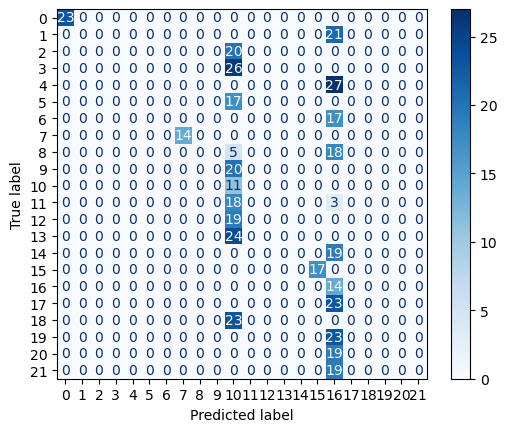

In [226]:
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap=plt.cm.Blues)
plt.show()

In [ ]:
# Each value shows how many times a true class was predicted as another class.
# Ideally, all values should lie on the diagonal (where prediction = actual).
#Most predictions are concentrated in column 10, meaning your model is:
# Predicting label 10 for many classes — even when it's incorrect.
# Misclassifying almost all other classes as 10.
# Logistic Regression model is performing poorly in multiclass classification here.
# It's suffering from class bias, heavily skewing predictions toward one class (likely class 10).